# 'Last words'
This is my own project which does not pursuite any goal except to practice my skills in parsing websites, working with python, data analysis and visualisation.

I scrutanised the data from "Texas department of criminal justice". Their website ( https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html) have an open API, so big thanks from me. 
It's main page looked pretty easy (in terms of parsing) for the newbie like me. But then I discovered that the significant part of the information is loaded in jpeg files, and that's a project for another time. Though the information about the 'last words' of the offenders is full, so I continued whith the further analysis. 

I'm not a sociologist to make any inferences based on this data, except the statistical ones, but even this is impossible now due to lack of some information. 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [531]:
T=pd.read_excel('Texas1.xlsx')

In [532]:
T=T.set_index('Name').transpose()
T=T.reset_index()
T=T.drop(['TDCJ Number'],axis=1)
T.head()

Name,index,Name,Date of Birth,Date Received,Age (when Received),Education Level (Highest Grade Completed),Date of Offense,Age (at the time of Offense),County,Race,...,Weight (in Pounds),Eye Color,Native County,Native State,Prior Prison Record,Summary of Incident,Co-Defendants,Race and Gender of Victim,Date of Execution,Last words
0,"Ochoa, Abel Revill","Ochoa, Abel Revill",01/23/1973,05/15/2003,30,12,08/04/2002,29,Dallas,Hispanic,...,182,Brown,Vicente Guerrero,"Durango, Mexico",None,"On August 4, 2002, in Dallas, Texas, Ochoa fa...",None,Four Hispanic Females; One Hispanic Male,"February 6, 2020","Yes sir. I would like to thank God, my dad, m..."
1,"Gardner, John","Gardner, John",01/03/1956,11/20/2006,50,12,01/23/2005,49,Collin,White,...,190 lbs,Blue,Forest,Mississippi,MS Dept of Corrections #55484 on an eight yea...,"On January 23, 2005 in Collin County, Gardner...",None,White Female,"January 15, 2020","Thank you thank you where’s the family, ok I ..."
2,"Runnels, Travis Trevino","Runnels, Travis Trevino",12/17/1972,11/18/2005,32,11,01/29/2003,30,Potter,Black,...,208,Brown,Dallas,Texas,TDCJ# 081244 on a five-year sentence for burg...,"On January 29, 2003, in Potter County, whil...",None,White male,"December 11, 2019",None
3,"Hall, Justen Grant","Hall, Justen Grant",06/16/1981,05/11/2005,23,9,10/28/2002,21,El Paso,White,...,197,Hazel,El Paso,Texas,TDCJ# 914053 on a 2 year sentence from El ...,"On October 28, 2002, in El Paso County, Tex...",None,Unknown Female,"November 6, 2019","Yeah, I want to address the Roundtree family ..."
4,"Sparks, Robert","Sparks, Robert",02/13/1974,01/08/2009,34,8,09/15/2007,33,Dallas,Black,...,247,Brown,Dallas,Texas,TDCJ #592340 on a twelve year sentence for ag...,"On September 15, 2007, in Dallas, Texas, the ...",None,Black female; two black males.,"September 25, 2019","Umm, Pamela can you hear me Stephanie, Hardy,..."


In [508]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
Year                                         569 non-null object
index                                        569 non-null object
Name                                         178 non-null object
Date of Birth                                178 non-null object
Date Received                                178 non-null object
Age (when Received)                          178 non-null object
Education Level (Highest Grade Completed)    178 non-null object
Date of Offense                              178 non-null object
Age (at the time of Offense)                 178 non-null object
County                                       178 non-null object
Race                                         178 non-null object
Gender                                       178 non-null object
Hair Color                                   177 non-null object
Height (in Feet and Inches)                  178 n

In [533]:
D=dict()
L=list()
# creating Counter of words and Sum of words
def Words(l,D):
    A=l.split()  
    Len=len(A) # Nmb of  words
    for ll in A:       
        for char in ll:
            if char in " ?.!/;:, ":
                ll=ll.replace(char,'')
        D[ll]=D.get(ll,0)+1
        L.append(ll)
    return Len, D,L

# Adding column "Year of execution"
A=pd.DataFrame(columns=['Year'],index=range(0,len(T)))
for i in range(0,len(T)):
    try:
        A['Year'][i]=T['Date of Execution'][i].rstrip()[(len(T['Date of Execution'][i].rstrip())-4):]
    except:
        A['Year'][i]=''
T=pd.concat([A,T],axis=1)

## Number of executions through the years

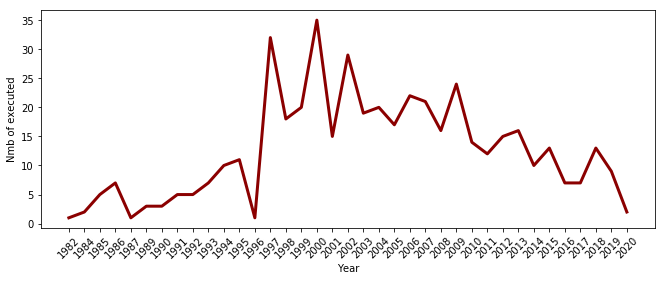

In [526]:
# Nmb of executions
Y=pd.DataFrame(T['Year'].dropna().value_counts()[1:]).sort_index()
fig,ax=plt.subplots(figsize=(11,4))
ax.plot(Y, lw=3, color='darkred')
plt.xlabel('Year')
plt.ylabel('Nmb of executed')
plt.xticks(fontsize=10, rotation=45)
plt.show()

In [514]:
# % of Nan
print('Share of missing values:', round(int(569-Y.sum())/569*100,2),'%')

Share of missing values: 17.93 %


So as was previously stated some data were missed (~18%), though we can compare it to the real data and see that the dynamic is the same.

In [518]:
Y_r=[1,0,3,6,10,6,3,4,4,5,12,17,14,19,3,37,20,35,40,17,33,24,23,19,24,26,18,24,17,13,15,16,10,13,7,7,13,9]

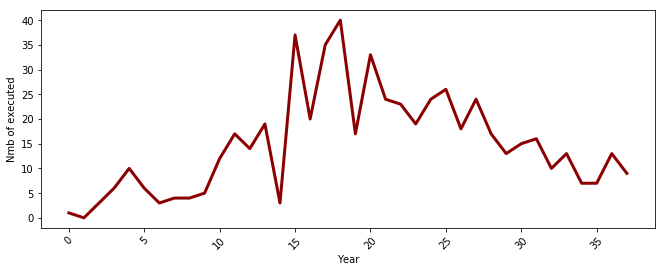

In [527]:
#Nmb of executions
#Y=pd.DataFrame(T['Year'].dropna().value_counts()[1:]).sort_index()
fig,ax=plt.subplots(figsize=(11,4))
ax.plot(Y_r, lw=3, color='darkred')
plt.xlabel('Year')
plt.ylabel('Nmb of executed')
plt.xticks(fontsize=10, rotation=45)
plt.show()

## Age at the time of offence 

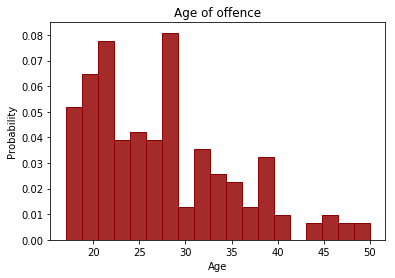

In [426]:
# Histogram of Age at the time of offence
m=[int(x) for x in T['Age (at the time of Offense)'].dropna()]
plt.hist(m,bins=19,density=True, color='brown',edgecolor='darkred')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age of offence')
plt.show()

In [534]:
# Creating a list of "Last Words"
for i in range(0,len(T)):
    try:
        T['len'][i],D,L=Words(T['Last words'][i],D)
    except:
        continue
So=sorted(D.items(), key=lambda x: x[1], reverse=True)

In [535]:
# Creating a list with "Last words"
A=str()
for i in range(2,len(L)):
    A=A+' '+str(L[i])

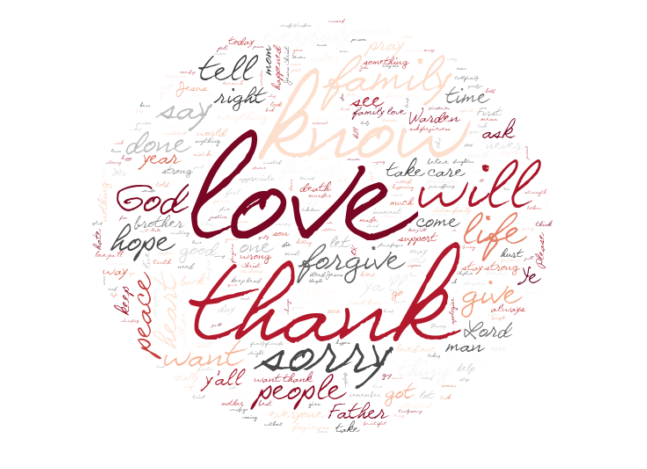

In [555]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
 
# Create a list of word
text=A

#Download mask
mask=np.array(Image.open('round.png'))
stopwords=set(STOPWORDS)
stopwords.update(['defendant','declined','last','statement','make', 'offender','going'])


# Create the wordcloud object
wordcloud = WordCloud(stopwords=stopwords,width=1600, height=800, max_words=300, background_color='white', mask=mask, 
                                        font_path='Galeforce BTN.ttf', colormap='RdGy',
                                            random_state=20).generate(text)  #RdGy-19 #gnuplot
image_colors=ImageColorGenerator(mask)
#wordcloud.recolor(color_func=image_colors)

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [554]:
wordcloud.to_file('Wcld.png')

## Words dynamic 

In [419]:
# creating Counter of words and Sum of words
def Words_(T,year):
    List_Year=list()
    for i in T.loc[T['Year']==year,'Last words']:
        for j in i.split():
            for char in j:
                if char in " ?.!/;:, '":
                    j=j.replace(char,'')
            List_Year.append(j)
    count = Counter(List_Year)
    W_a=sum(count.values())        # Nmb of words
    return count, W_a

In [431]:
# Creating a list of "Last Words" for every year
DictYear=dict()
SYear=dict()
for i in T['Year'].unique():
    D,S=Words_(T,i)                
    DictYear[i]=D
    #DictYear.update({i:D})
    SYear[i]=S

## Single words analysis 

In [432]:
# Yearly data on words
w=['God','love','family','thank','sorry','Jesus']
Word_dict=pd.DataFrame()
Word=dict()
for j in list(w):
    for i in range(1984,2021):
        try:
            Word[i]=DictYear['{}'.format(i)][j]/SYear['{}'.format(i)]*100
        except:
            Word[i]=0
    Word_dict['{}'.format(j)]=list(Word.values())

In [433]:
Word_dict.columns

Index(['God', 'love', 'family', 'thank', 'sorry', 'Jesus'], dtype='object')

In [434]:
# Moving average
rolling_mean = Word_dict.rolling(window=5).mean()
R_words=pd.DataFrame(rolling_mean)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


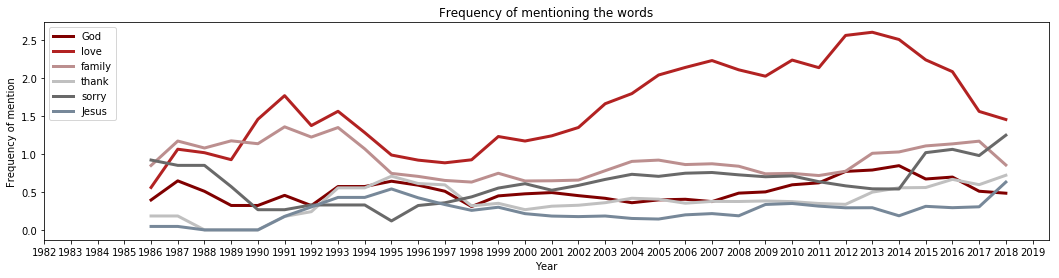

In [445]:
color=['maroon','firebrick','rosybrown','silver','dimgrey','lightslategrey']
fig,ax=plt.subplots(figsize=(18,4))
ax.set_color_cycle(color)
ax.plot(R_words, lw=3)
plt.title('Frequency of mentioning the words')
plt.xlabel('Year')
plt.ylabel('Frequency of mention')
plt.xticks(range(38),list(range(1982,2020)))
plt.legend(Word_dict.columns,loc="upper left")
plt.show()

##  Race

Right now this is not a reliable data, when I have complete information I'll update the graphs and make proper inferences.

In [233]:
# creating Counter of words and Sum of words
def Words_r(T,race):
    List_Race=list()
    for i in T.loc[T['Race']=='{}'.format(race),'Last words']:
        for j in i.split():
            for char in j:
                if char in " ?.!/;:, '":
                    j=j.replace(char,'')
            List_Race.append(j)
    count = Counter(List_Race)
    W_a=sum(count.values())        # Nmb of words
    return count, W_a

In [234]:
# Creating a list of "Last Words" for every race
DictRace=dict()
SRace=dict()
for i in ['White','Black','Hispanic']:
    D,S=Words_r(T,i)                
    DictRace[i]=D
    #DictYear.update({i:D})
    SRace[i]=S

In [304]:
T['Race'].dropna().value_counts()

Black       64
White       62
Hispanic    51
white        1
Name: Race, dtype: int64

In [308]:
All=[int(x)/100 for x in SRace.values()]
All=np.array(All)/np.array([64,62,51])

In [523]:
w=['God','love','family','thank','sorry','Jesus']
Word_dict=pd.DataFrame()
Word=dict()
for j in list(w):
    for i in ['Black','White','Hispanic']:
        try:
            Word[i]=DictRace['{}'.format(i)][j]/SRace['{}'.format(i)]*100
        except:
            Word[i]=0
    Word_dict['{}'.format(j)]=list(Word.values())

In [342]:
# Adding column 'All words'
Word_dict=pd.concat([Word_dict,pd.DataFrame(All)],axis=1)
Word_dict=Word_dict.rename(columns={0:'All words(H)'})

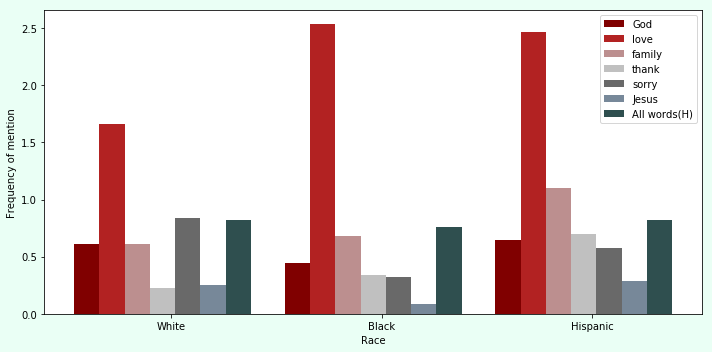

In [414]:
fig, ax=plt.subplots(figsize=(10,5))
width=0.3
x1=[0,2.5,5]
color=['maroon','firebrick','rosybrown','silver','dimgrey','lightslategrey','darkslategrey']
ax.bar(x1,Word_dict['God'],width=width,color=color[0])
ax.bar([x+width for x in x1],Word_dict['love'],width=width,color=color[1])
ax.bar([x+width*2  for x in x1],Word_dict['family'],width=width,color=color[2])
ax.bar([x+width*3 for x in x1],Word_dict['thank'],width=width,color=color[3])
ax.bar([x+width*4 for x in x1],Word_dict['sorry'],width=width,color=color[4])
ax.bar([x+width*5 for x in x1],Word_dict['Jesus'],width=width,color=color[5])
ax.bar([x+width*6 for x in x1],Word_dict['All words(H)'],width=width,color=color[6])
#plt.title('Frequency of mentioning the words')
plt.xlabel('Race')
plt.ylabel('Frequency of mention')
plt.xticks([x+1 for x in x1],['Black','White','Hispanic'])
plt.legend(Word_dict.columns,loc="upper right")
fig.tight_layout()
fig.set_facecolor('#eafff5')
#ax.set_facecolor('seashell')
plt.show()